# Ensemble Learning -Diabeties Dataset

## Data Dictionary

## Importing Libraires

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")

In [14]:
df=pd.read_csv("C:/Users/delll/Desktop/Python/DataSets/Diabeted_Ensemble.xls")
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', ' Triceps skin fold thickness',
       ' 2-Hour serum insulin', ' Body mass index',
       ' Diabetes pedigree function', ' Age (years)', ' Class variable'],
      dtype='object')

In [15]:
df.rename(columns={' Number of times pregnant':"preganices",
                   ' Plasma glucose concentration':"glucose",
                   ' Diastolic blood pressure':"BP",
                   ' Triceps skin fold thickness':"SkinThickness",
                   ' 2-Hour serum insulin':"insulin",
                   ' Body mass index':"BMI",
                   ' Diabetes pedigree function':"DiabetesPedigreefunction",
                   ' Age (years)':"Age",
                   ' Class variable':"Target"},inplace=True)

In [6]:
df.columns

Index(['pergnacies', 'glucose', 'BP', 'SkinThickness', 'insulin', 'BMI',
       'DiabetesPedigreefunction', 'Age', 'Target'],
      dtype='object')

In [7]:
df.dtypes

pergnacies                    int64
glucose                       int64
BP                            int64
SkinThickness                 int64
insulin                       int64
BMI                         float64
DiabetesPedigreefunction    float64
Age                           int64
Target                       object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pergnacies                768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   BP                        768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreefunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Target                    768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [9]:
df.isnull().sum()

pergnacies                  0
glucose                     0
BP                          0
SkinThickness               0
insulin                     0
BMI                         0
DiabetesPedigreefunction    0
Age                         0
Target                      0
dtype: int64

In [10]:
df.describe()

,pergnacies,glucose,BP,SkinThickness,insulin,BMI,DiabetesPedigreefunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


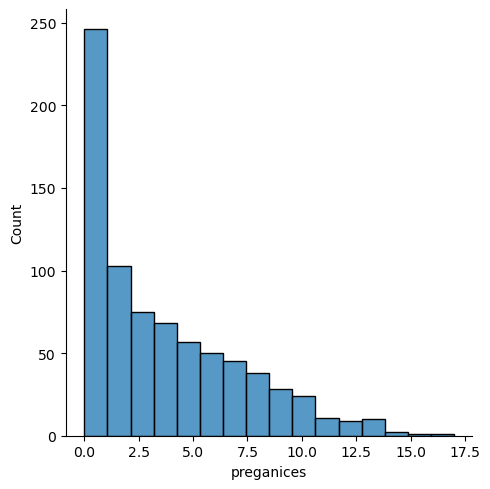

In [19]:
sns.displot(df["preganices"])
plt.show()

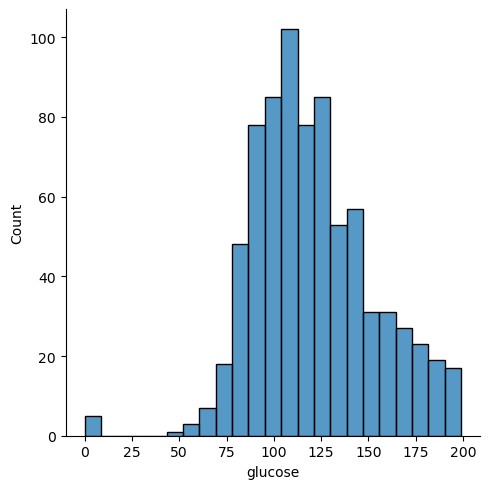

In [20]:
sns.displot(df["glucose"])
plt.show()

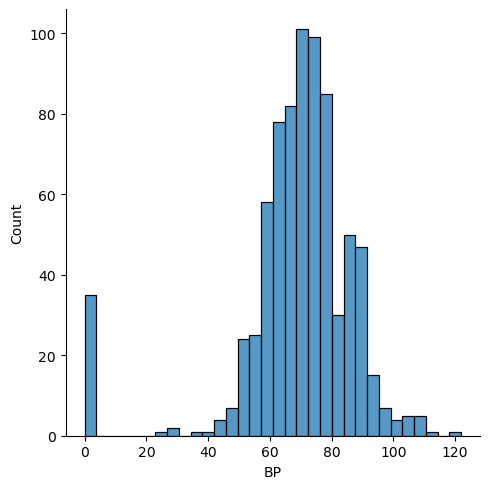

In [21]:
sns.displot(df["BP"])
plt.show()

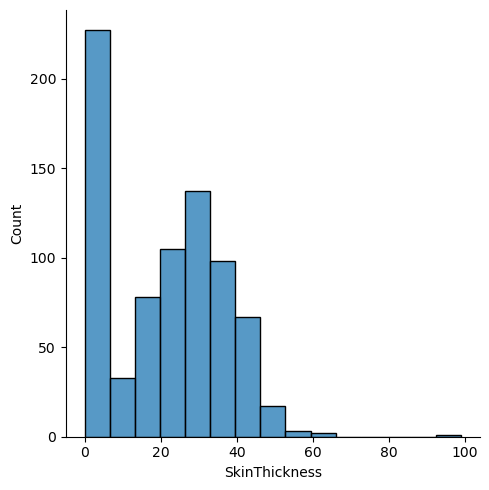

In [22]:
sns.displot(df["SkinThickness"])
plt.show()

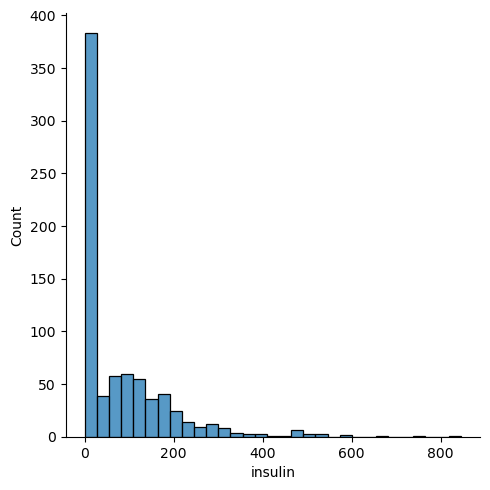

In [23]:
sns.displot(df["insulin"])
plt.show()

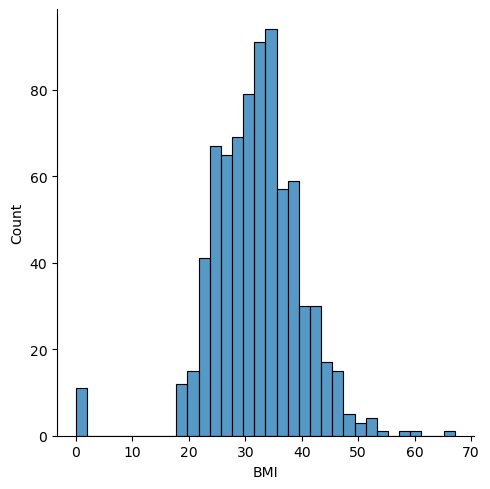

In [24]:
sns.displot(df["BMI"])
plt.show()

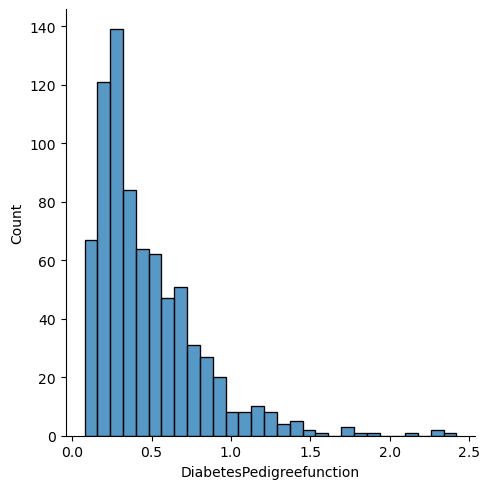

In [25]:
sns.displot(df["DiabetesPedigreefunction"])
plt.show()

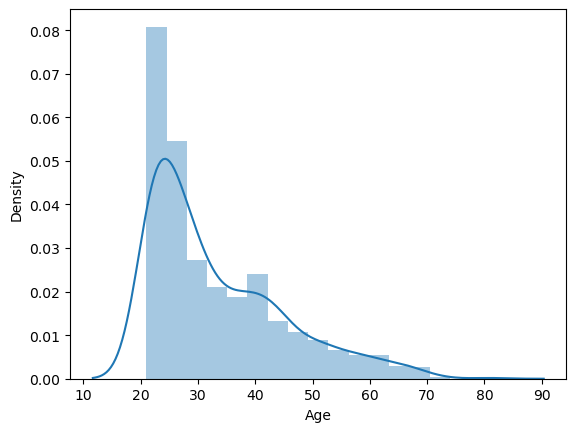

In [26]:
sns.distplot(df["Age"])
plt.show()

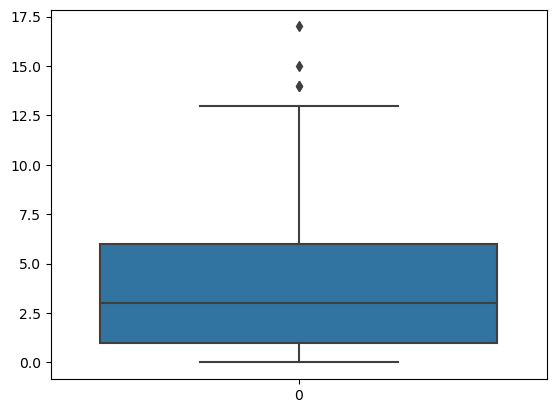

In [27]:
sns.boxplot(df["preganices"])
plt.show()

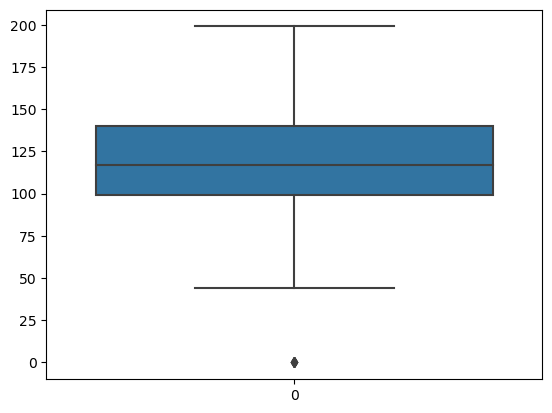

In [28]:
sns.boxplot(df["glucose"])
plt.show()

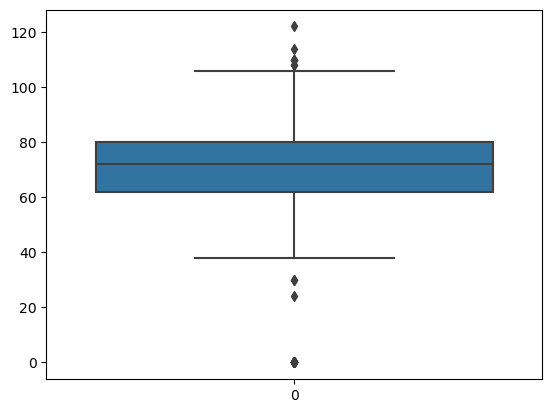

In [30]:
sns.boxplot(df["BP"])
plt.show()

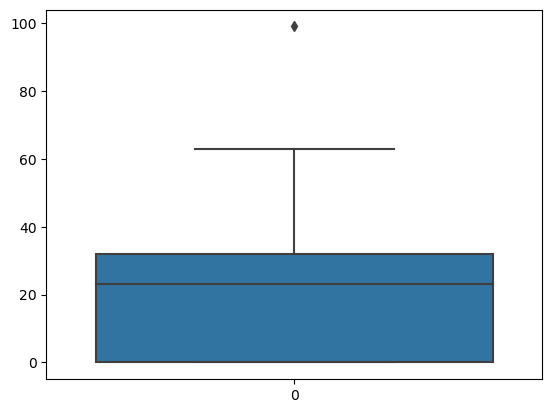

In [31]:
sns.boxplot(df["SkinThickness"])
plt.show()

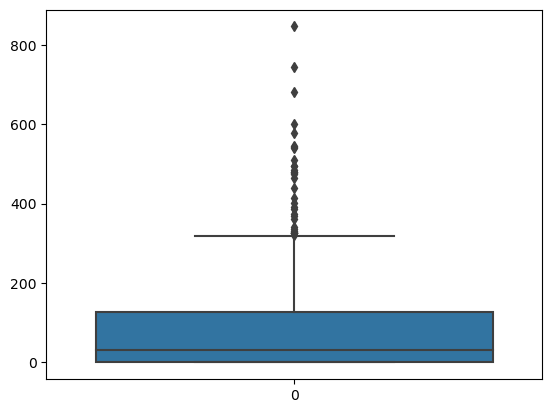

In [32]:
sns.boxplot(df["insulin"])
plt.show()

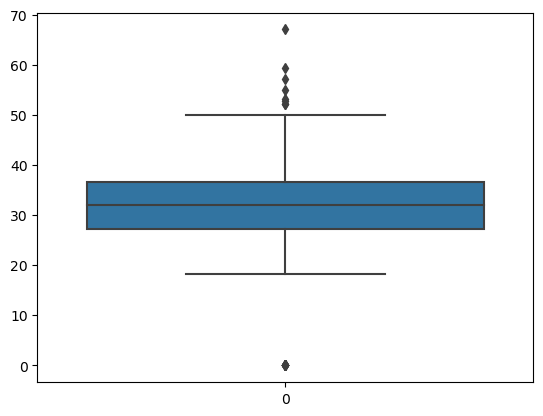

In [33]:
sns.boxplot(df["BMI"])
plt.show()

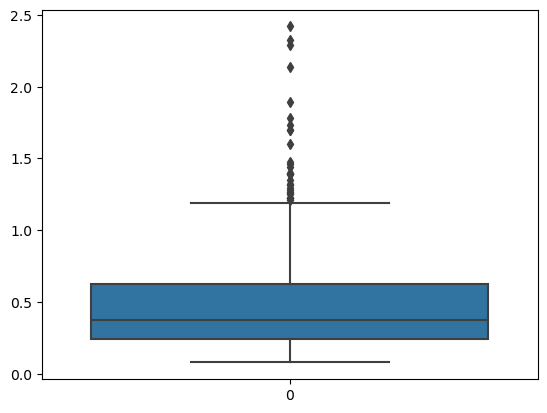

In [34]:
sns.boxplot(df["DiabetesPedigreefunction"])
plt.show()

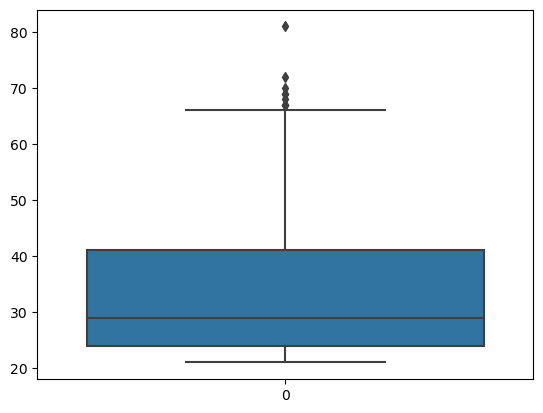

In [36]:
sns.boxplot(df["Age"])
plt.show()

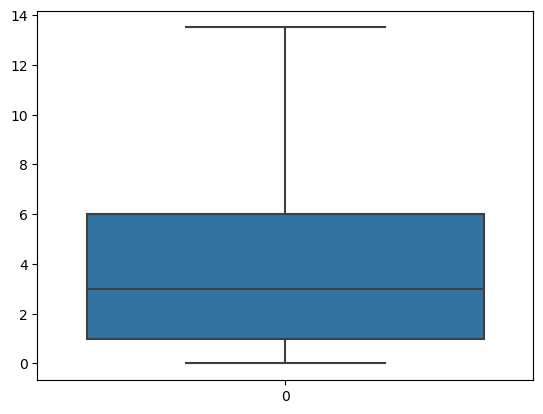

In [39]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["preganices"],tail="both")
df["preganices"]=winsor.fit_transform(df[["preganices"]])
sns.boxplot(df["preganices"])
plt.show()

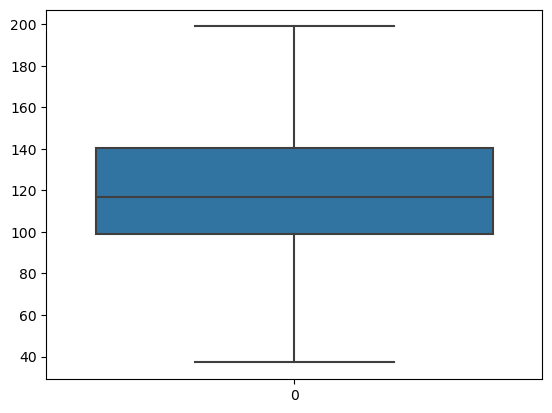

In [40]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["glucose"],tail="both")
df["glucose"]=winsor.fit_transform(df[["glucose"]])
sns.boxplot(df["glucose"])
plt.show()

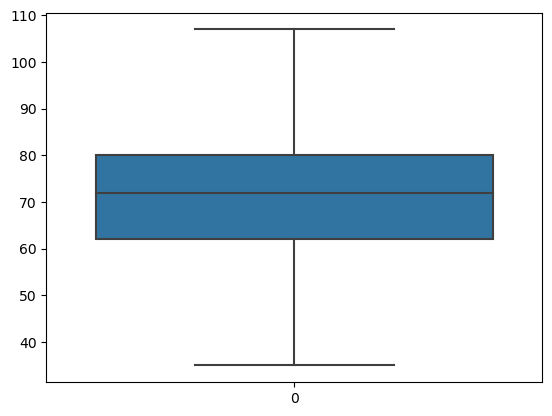

In [42]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["BP"],tail="both")
df["BP"]=winsor.fit_transform(df[["BP"]])
sns.boxplot(df["BP"])
plt.show()

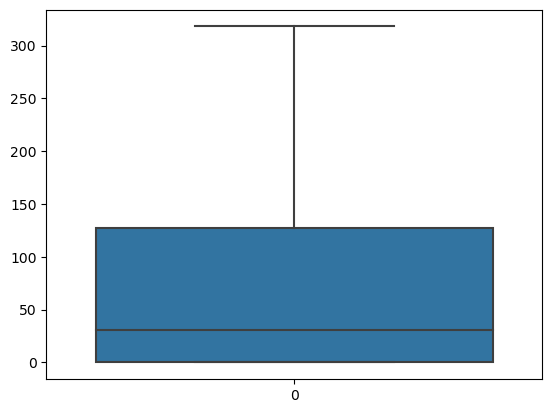

In [43]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["insulin"],tail="both")
df["insulin"]=winsor.fit_transform(df[["insulin"]])
sns.boxplot(df["insulin"])
plt.show()

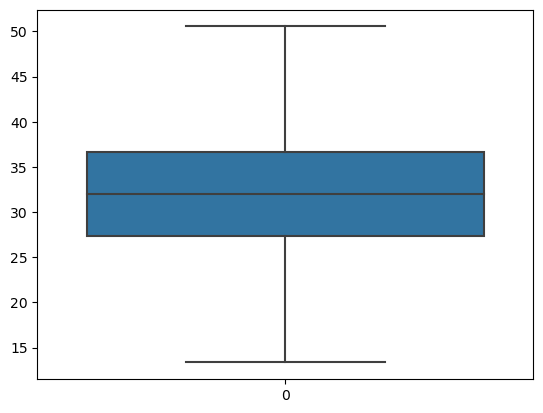

In [44]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["BMI"],tail="both")
df["BMI"]=winsor.fit_transform(df[["BMI"]])
sns.boxplot(df["BMI"])
plt.show()

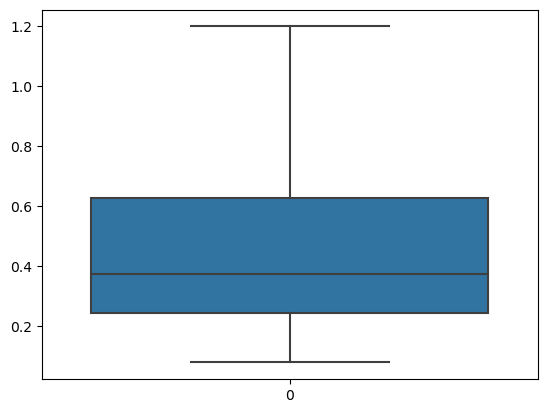

In [45]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["DiabetesPedigreefunction"],tail="both")
df["DiabetesPedigreefunction"]=winsor.fit_transform(df[["DiabetesPedigreefunction"]])
sns.boxplot(df["DiabetesPedigreefunction"])
plt.show()

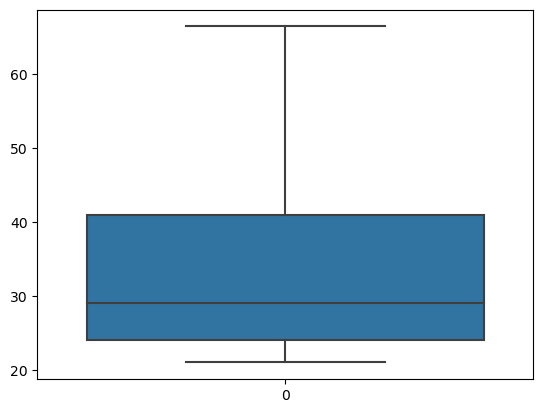

In [46]:
winsor=Winsorizer(capping_method="iqr",fold=1.5,variables=["Age"],tail="both")
df["Age"]=winsor.fit_transform(df[["Age"]])
sns.boxplot(df["Age"])
plt.show()

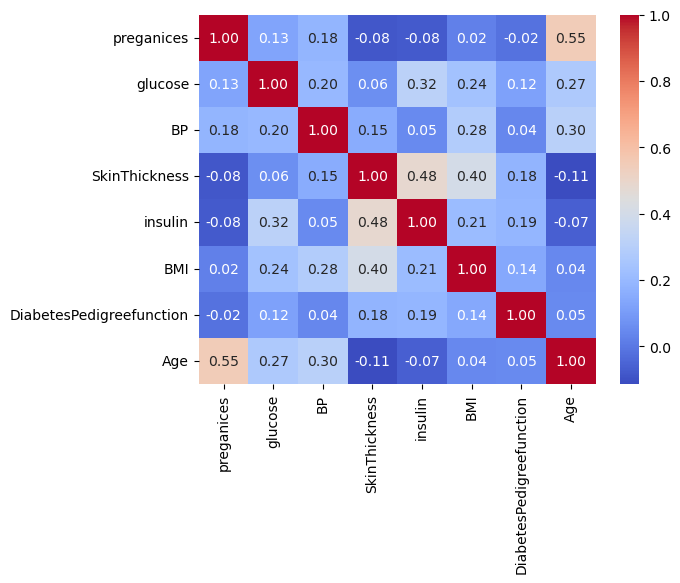

In [47]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [49]:
le=LabelEncoder()
df["Target"]=le.fit_transform(df["Target"])

In [50]:
x=df.drop(["Target"],axis=1)
y=df["Target"]

In [51]:
x.head()

,preganices,glucose,BP,SkinThickness,insulin,BMI,DiabetesPedigreefunction,Age
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0


In [53]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.64714967,  0.86192556,  0.09269135, ...,  0.20935933,
         0.58892732,  1.44569096],
       [-0.84896998, -1.15943299, -0.33020145, ..., -0.78425421,
        -0.37810147, -0.189304  ],
       [ 1.24559754,  1.98490253, -0.47116571, ..., -1.25267202,
         0.74659506, -0.10325164],
       ...,
       [ 0.34792574, -0.00437096,  0.09269135, ..., -0.84103213,
        -0.74949659, -0.27535637],
       [-0.84896998,  0.15605432, -0.75309424, ..., -0.28744744,
        -0.38510892,  1.18753386],
       [-0.84896998, -0.90275254, -0.04827292, ..., -0.24486401,
        -0.50423566, -0.87772293]])

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,stratify=y,random_state=10)

In [55]:
x_train.shape

(576, 8)

In [56]:
x_test.shape

(192, 8)

In [57]:
y_train.value_counts()

0    375
1    201
Name: Target, dtype: int64

In [58]:
y_test.value_counts()

0    125
1     67
Name: Target, dtype: int64

In [60]:
#cross_val_score() returns an array of scores obtained in each fold of cross-validation.
scores = cross_val_score(DecisionTreeClassifier(), x, y, cv=5)
scores

array([0.66883117, 0.63636364, 0.68181818, 0.77124183, 0.74509804])

In [61]:
#calculates the mean of these scores, providing an overall measure of model performance across all folds.
scores.mean()

0.7006705712588065

In [62]:
bag_model=BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    max_samples=0.8,
    oob_score=True,
    random_state=0)

bag_model.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.8,
                  n_estimators=100, oob_score=True, random_state=0)

In [63]:
#The OOB score obtained is approximately 0.76, indicating the accuracy of the model 
#when evaluated on the unseen samples not used in training.
bag_model.oob_score_

0.7586805555555556

In [64]:
#The accuracy score obtained represents the performance of the bagging classifier on the unseen data from the test set is 79%.
bag_model.score(x_test,y_test)

0.7916666666666666

In [65]:
scores=cross_val_score(bag_model,x,y,cv=5)
scores

array([0.72727273, 0.74025974, 0.75974026, 0.83006536, 0.75163399])

In [66]:
scores.mean()

0.7617944147355913

In [67]:
scores=cross_val_score(RandomForestClassifier(n_estimators=50),x,y,cv=5)
scores.mean()

0.7734912146676853

# Inferences: